<a href="https://colab.research.google.com/github/yanarkpanjaitan/Portofolio/blob/main/Data_Wrangling_using_Python_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Utility Function Defined
## Import pyplot from matplotlib
import matplotlib.pyplot as plt

## Define a Plot Method to be used in the notebook to plot the data
def plot_data(df_fires, xlabel, ylabel):
    #Creating a Bar Graph
    #Plot X Values and Y Values
    plt.figure(figsize=(25,15))
    plt.bar(df_fires[xlabel], df_fires[ylabel], color = (0.5,0.1,0.5,0.6))

    #Add Actual Title and Title for Subheadings
    plt.suptitle('Amazon Forest Fires Statistics', fontsize=20)
    plt.title('Using Data from Years 1998 - 2017', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
    for i, num in enumerate(df_fires[ylabel]):
        plt.text(
            i,
            num-100,
            num,
            ha='center',
            verticalalignment='top',
            fontsize=12,
            rotation=45)

    plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)

    plt.setp(plt.gca().get_yticklabels(), fontsize=20)

In the code cell below import the
- Pandas as __pd__,
- NumPy as __np__, and
- pyplot from matplotlib as __plt__.

In [ ]:
# Solution
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

As a next step we will import the csv data into the Pandas DataFrame. You have already learnt how to import the csv data from file into Pandas DataFrames.

In this step you will write the code to load a CSV file into Pandas DataFrame.

Write a code to perform following:
1. Create a DataFrame by the name of df_ffire.
2. In this DataFrame load a csv file using Pandas __read_csv()__ function
3. Full Path and Name of the file is __"./dataset/module4/brazilianfire.csv"__
4. Note that CSV file has header record and following are names in the file, you need to rearrange the data in DataFrame in the following order
    - Date Reported
    - Year
    - Month
    - State
    - Number of Fires
5. Display the DataFrame (top 10 rows) and verify that the columns are in order.
6. Generate the Statistical Summary of the DataFrame for all the columns

In [ ]:
df_ffire = pd.read_csv('./dataset/module3/brazilianfire.csv')
order_col = ['Date Reported', 'Year', 'Month', 'State', 'Number of Fires']
df_ffire['Number of Fires'] = df_ffire['Number of Fires'].astype(int)
df_ffire = df_ffire[order_col]
df_ffire.head(10)

,Date Reported,Year,Month,State,Number of Fires
0,1/01/1998,1998,January,Acre,0
1,1/01/1999,1999,January,Acre,0
2,1/01/2000,2000,January,Acre,0
3,1/01/2001,2001,January,Acre,0
4,1/01/2002,2002,January,Acre,0
5,1/01/2003,2003,January,Acre,10
6,1/01/2004,2004,January,Acre,0
7,1/01/2005,2005,January,Acre,12
8,1/01/2006,2006,January,Acre,4
9,1/01/2007,2007,January,Acre,0


In [ ]:
df_ffire.describe(include='all')

,Date Reported,Year,Month,State,Number of Fires
count,6454,6454.000000,6454,6454,6454.000000
unique,20,NaN,12,27,NaN
top,1/01/2007,NaN,January,Alagoas,NaN
freq,324,NaN,541,240,NaN
mean,NaN,2007.461729,NaN,NaN,108.235358
std,NaN,5.746654,NaN,NaN,190.843947
min,NaN,1998.000000,NaN,NaN,0.000000
25%,NaN,2002.000000,NaN,NaN,3.000000
50%,NaN,2007.000000,NaN,NaN,24.000000
75%,NaN,2012.000000,NaN,NaN,113.000000


Based on the information collected so far, can you answer the following:

1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

#### Solution as follows:

__Questions__
1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

__Answers__
1. 998 Fires in a day is the maximum number of Fires reported
2. Data if available for total 27 states

## TODO Activity 1
__Are you able to find which state has recorded the maximum number of fires on any given day (not the total sum), and in which month did it occur?__

HINT:
- Create a boolean filter based on condition on column __Number of Fires__, and
- using this filter perform indexing operation on DataFrame to retrieve the corresponding records

In [ ]:
## Solution for Activity 1
max_no_fire = df_ffire['Number of Fires'].max()
df_ffire[df_ffire['Number of Fires']==max_no_fire]

,Date Reported,Year,Month,State,Number of Fires
888,1/01/2008,2008,September,Amazonas,998


## ACTIVITY 1 Answer

Maximum number of Fires __(998 fires)__ were reported in the month of __September 2008__ in the state of __Amazonas__

<br>NOTE: As you can observe the Date Reported columns has been defaulted to the January 1st of the year it was reported, as such we potentially will not be using this columns for any further analysis

## TODO Activity 2:  Quantitatve Analytics for States

1. Calculate the total number of fires for the entire duration (i.e. for 1998 to 2018) for every state
2. Display the DataFrame and verify that results looks OK (i.e. GroupBy and Aggregation has been calcuated correctly)
3. Print the Summary Statistics - and what is the Minimum and Maximum number of total fires records?
4. Which state has recorded minimum number of Total Fires, and which state has recorded maximum number of Total Fires?

__HINT:__
1. Perform the groupby operation on State, and aggregation operation on Number of Fires Columns.
2. Pandas have methods idxmax() and idxmin() which returns the Series of Index(Row Labels) corresponding to the maximum and minimum values respectively, in a Pandas Series (or a Column in DataFrame)

In [ ]:
##Solution for Activity 2 (Step 1, and Step 2)
df_grp_statefires = df_ffire.groupby(['State']).agg({'Number of Fires': np.sum})
df_grp_statefires.head()

,Number of Fires
State,
Acre,18452
Alagoas,4644
Amapá,21831
Amazonas,30636
Bahia,44718


In [ ]:
##Solution for Activity 2 (Step 3)
df_grp_statefires.describe()

,Number of Fires
count,27.000000
mean,25872.259259
std,14251.935889
min,3237.000000
25%,15619.500000
50%,24459.000000
75%,37565.000000
max,51118.000000


__Answer to Question 3__
- Minimum Number of Total Fires = 3237
- Maximum Number of Total Fires = 51118

In [ ]:
##Solution for Activity 2 (Step 4)
print("Max of Total Fires recorded were %d, and this was for state: %s"\
      %(df_grp_statefires['Number of Fires'].max(),\
             df_grp_statefires.idxmax()[0]))

print("Min of Total Fires recorded were %d, and this was for state: %s"\
      %(df_grp_statefires['Number of Fires'].min(),\
             df_grp_statefires.idxmin()[0]))

Max of Total Fires recorded were 51118, and this was for state: São Paulo
Min of Total Fires recorded were 3237, and this was for state: Sergipe


## TODO: Activity 3 Plot the Graph showing the Total Number of Fires for every State.

NOTE: We have provided a Utility Method __plot_data()__ which accepts the following input parameters:
- DataFrame Object containing the values of States, and Number of Fires as its Columns.
- xlabel -> is the name of the Column -> values from which are reprsented on x-Axis
- ylabel -> is the name of the Column which contains the values (corresponding to xlabel values to be plotted y-Axis)
- xlabel and ylabel = Name of the Columns in the DataFrame passed as input to the function __plot_data()__

You will call this function __plot_data()__, with correct set of paramters to plot the data.

__Activities to be performed:__
1. Reset the index of the GroupedBy DataFrame so that States are not considered as index, and are rather considered as Data Column (Hint: use method __reset_index()__ for this operation
2. Arrange the DataFrame in descending order of "Total Number of Fires".
2. Create a variable xlabel, and save the name of the column that has the values of States in it.
3. Create a variable ylabel, and save the name of the columns that stores the total number of fires for every state in it.
4. Call the function __plot_data()__, and pass the following parameter in sequence:
    - DataFrame object created in Step 1.
    - xlabel created in Step 2, and
    - ylabel created in Step 3.
    


In [ ]:
## Solution for Activity 3

## Step 1:using inline transformation, as we will pass the original DataFrame as function parameter
df_grp_statefires.reset_index(level=0, inplace=True)

## Step 2: Descending Sort inplace
df_grp_statefires.sort_values(by="Number of Fires", ascending=False, inplace=True)

## Calulate xLabel
xlabel = df_grp_statefires.columns[0]

## Calculate ylabel
ylabel = df_grp_statefires.columns[1]

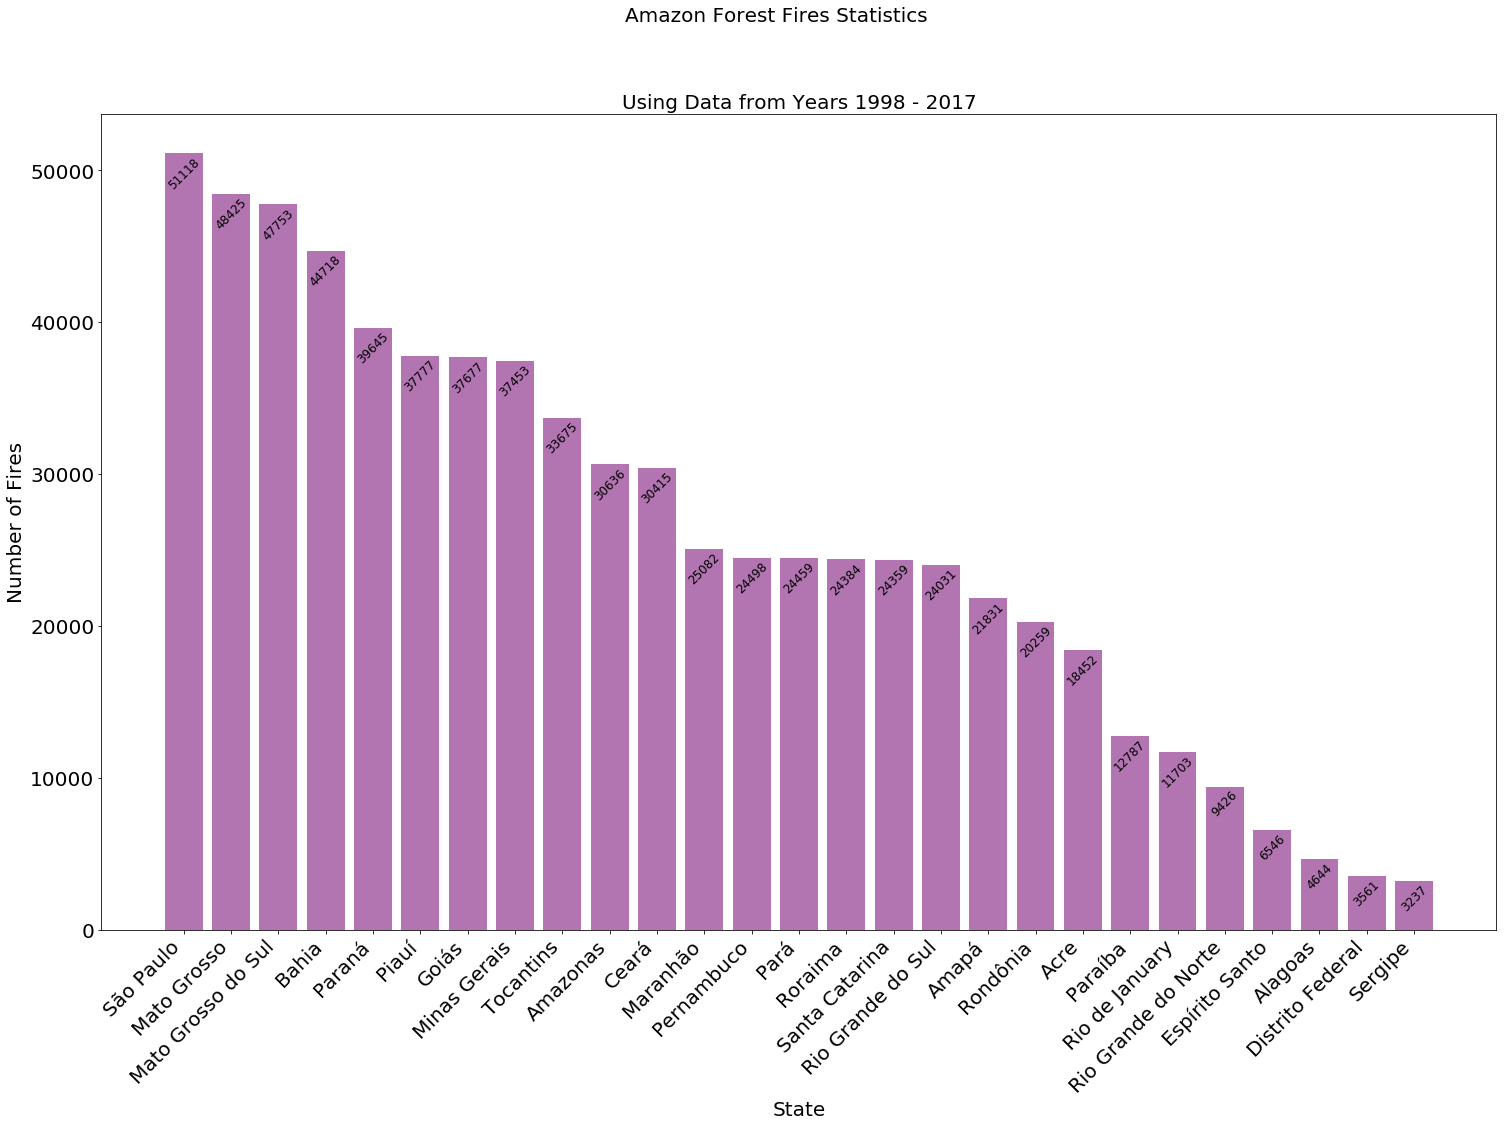

In [ ]:
## Solution for Activity 3 (Step 5)
plot_data(df_grp_statefires,xlabel, ylabel)